# **先匯入鐵達尼號資料 / Importing Data Sets**
# **(kaggle_titanic_train/kaggle_titanic_test)**

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle_titanic_test.csv to kaggle_titanic_test (1).csv
Saving kaggle_titanic_train.csv to kaggle_titanic_train (1).csv
User uploaded file "kaggle_titanic_test.csv" with length 29474 bytes
User uploaded file "kaggle_titanic_train.csv" with length 61194 bytes


# **建立 Logistic 迴歸模型 / Building Logistic Regression Model**

In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score

# 載入資料 / reading csv files
url_train = "/content/kaggle_titanic_train.csv"
url_test = "/content/kaggle_titanic_test.csv"
titanic_train = pd.read_csv(url_train)
titanic_test = pd.read_csv(url_test)

# 將 Age 遺漏值以 median 填補 / Fill the void of the column "Age" with median
age_median_train = np.nanmedian(titanic_train["Age"])
new_Age_train = np.where(titanic_train["Age"].isnull(), age_median_train, titanic_train["Age"])
titanic_train["Age"] = new_Age_train
titanic_train

age_median_test = np.nanmedian(titanic_test["Age"])
new_Age_test = np.where(titanic_test["Age"].isnull(), age_median_test, titanic_test["Age"])
titanic_test["Age"] = new_Age_test
titanic_test

# 創造 dummy variables / Create dummy variables for the column "Sex"
titanic_train_sex = pd.get_dummies(titanic_train["Sex"])

titanic_test_sex = pd.get_dummies(titanic_test["Sex"])


# 建立 x_train & x_val & x_test / Creating training set, validation set, and test set of X
df1 = pd.DataFrame([titanic_train["Pclass"], titanic_train["Age"]]).T
df2 = df1.join(titanic_train_sex, how='outer')
df3 = df2.join(titanic_train["Survived"])
df4 = pd.DataFrame([titanic_test["Pclass"], titanic_test["Age"]]).T
df5 = df4.join(titanic_test_sex, how='outer')
df6 = df5.join(titanic_test["Survived"])

N = len(df3)
N1 = int(4 * N / 5) # 切分為4：1 / Divide df3 into two sets using a ratio of 4:1, 4 being the training set and 1 being the validation set
x_train = df3.iloc[:N1, :-1]
x_val = df3.iloc[N1:, :-1]
x_test = df6.iloc[:, :-1]

# 建立 train_Y & valid_Y &test_Y / Creating training set, validation set, and test set of Y
y_train = df3.iloc[:N1, -1]
y_val = df3.iloc[N1:, -1]
y_test = df6.iloc[:, -1]

# 標準化 / Regularization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_val_std = sc.transform(x_val)
x_test_std = sc.transform(x_test)


# 建立模型 / Building the model
model = LogisticRegression()
model.fit(x_train_std, y_train)

# 先對validation做跑分 / Score the model using the validation set
y_predict_val = model.predict(x_val_std)
print(f'The score for this model is {model.score(x_val_std, y_val):.6f}.')
recall = recall_score(y_val, y_predict_val, average=None).sum()
print(f'The recall for this model is {recall:.6f}.')

# 印出係數 / Print coefficients
print(model.coef_)

# 印出截距 / Print intercept
print(model.intercept_ )
print(y_predict_val)

The score for this model is 0.804469.
The recall for this model is 1.557065.
[[-0.90522237 -0.34207341  0.6161819  -0.6161819 ]]
[-0.59723819]
[0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0
 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0]


In [5]:
# 這邊可以用迴圈調整參數：C懲罰係數 & Z值。
# 利用迴圈調整參數對val不斷跑分，找出理想模型
# Use loop to adjust the parameter C and Z to find the best model (scoring each model with the validation set)

In [12]:
# 再利用test做模型驗證跑分 / Score the model using the test set
y_predict = model.predict(x_test_std)
print(f'The score for this model is {model.score(x_test_std, y_test):.6f}.') #accuracy
recall = recall_score(y_test, y_predict, average=None).sum()
print(f'The recall for this model is {recall:.6f}.') #recall rate
print(y_predict)

The score for this model is 0.973684.
The recall for this model is 1.950188.
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


# **輸出機率分類判斷 / Probability for each X(1~3)**

In [7]:
prob_val = np.round(model.predict_proba(x_val_std),4)
prob_test = np.round(model.predict_proba(x_test_std),4)
print(prob_val)
print("-----------------------------")
print(prob_test)

[[0.645  0.355 ]
 [0.9054 0.0946]
 [0.856  0.144 ]
 [0.8804 0.1196]
 [0.0968 0.9032]
 [0.1912 0.8088]
 [0.9031 0.0969]
 [0.914  0.086 ]
 [0.1198 0.8802]
 [0.8747 0.1253]
 [0.7875 0.2125]
 [0.8494 0.1506]
 [0.5114 0.4886]
 [0.8831 0.1169]
 [0.2037 0.7963]
 [0.4168 0.5832]
 [0.7452 0.2548]
 [0.3978 0.6022]
 [0.078  0.922 ]
 [0.8564 0.1436]
 [0.7599 0.2401]
 [0.7351 0.2649]
 [0.7351 0.2649]
 [0.9043 0.0957]
 [0.5472 0.4528]
 [0.5636 0.4364]
 [0.9031 0.0969]
 [0.9031 0.0969]
 [0.518  0.482 ]
 [0.5701 0.4299]
 [0.0642 0.9358]
 [0.8935 0.1065]
 [0.9098 0.0902]
 [0.7641 0.2359]
 [0.8718 0.1282]
 [0.2037 0.7963]
 [0.459  0.541 ]
 [0.9098 0.0902]
 [0.1144 0.8856]
 [0.8395 0.1605]
 [0.914  0.086 ]
 [0.891  0.109 ]
 [0.291  0.709 ]
 [0.6069 0.3931]
 [0.9031 0.0969]
 [0.7088 0.2912]
 [0.9161 0.0839]
 [0.0859 0.9141]
 [0.9031 0.0969]
 [0.9292 0.0708]
 [0.8831 0.1169]
 [0.0923 0.9077]
 [0.8718 0.1282]
 [0.131  0.869 ]
 [0.518  0.482 ]
 [0.4329 0.5671]
 [0.9031 0.0969]
 [0.9119 0.0881]
 [0.8935 0.106

# **混淆矩陣 / Confusion Matrix**

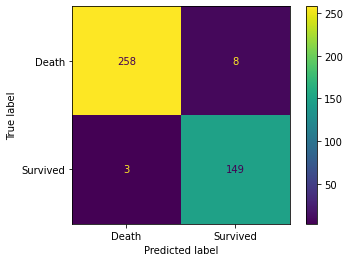

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score
import matplotlib.pyplot as plt
target_names = ['Death', 'Survived']
cm = confusion_matrix(y_test, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

# **Logistic 迴歸模型係數檢定 / Evaluation (P-value)**

In [9]:
from sklearn import preprocessing, linear_model
from sklearn.feature_selection import f_regression

# 印出 p-value
print(f_regression(x_train_std, y_train)[1])

[5.85598070e-18 5.37017165e-02 3.46393245e-55 3.46393245e-55]


# **Logistic 迴歸模型績效 / Evaluation**
**Accuracy & Recall Rate**


In [10]:
print(classification_report(y_test, y_predict, target_names=target_names, digits=6))

              precision    recall  f1-score   support

       Death   0.988506  0.969925  0.979127       266
    Survived   0.949045  0.980263  0.964401       152

    accuracy                       0.973684       418
   macro avg   0.968775  0.975094  0.971764       418
weighted avg   0.974156  0.973684  0.973772       418



In [11]:
# 附註：回去翻test資料，266名男性都死了，152名女性全數存活。
# Note: According to the test set, all 266 males died and all 152 females survived.